In [1]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas.
import numpy as np

#Importa la biblioteca matplotlib con el alias plt, con el submodulo pyplot que se usa para la creacion de graficos.
import matplotlib.pyplot as plt

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir

,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [2]:
grd.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHAALTA',
       'TIPOALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [3]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.columns

Index(['COD_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO', 'FECHA_NACIMIENTO',
       'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO', 'FECHA_ALTA',
       'TIPO_ALTA', 'DIAGNOSTICO1', 'IR_29301_COD_GRD', 'IR_29301_PESO',
       'IR_29301_SEVERIDAD', 'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA',
       'NOMBRE_HOSPITAL'],
      dtype='object')

In [4]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA'],
      dtype='object')

In [5]:
#Vemos quienes murieron y creamos una columna boinaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f.head(5)

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0


In [6]:
grd_f.columns

Index(['COD_HOSPITAL', 'NOMBRE_HOSPITAL', 'CIP_ENCRIPTADO', 'SEXO',
       'FECHA_NACIMIENTO', 'SERVICIO_SALUD', 'TIPO_INGRESO', 'FECHA_INGRESO',
       'FECHA_ALTA', 'TIPO_ALTA', 'DIAGNOSTICO1', 'NOMBRE_IR',
       'IR_29301_COD_GRD', 'IR_29301_PESO', 'IR_29301_SEVERIDAD',
       'IR_29301_MORTALIDAD', 'EDAD', 'DIAS_ESTANCIA', 'FALLECIDO'],
      dtype='object')

De ahora en adelante hay que seleccionar que variables considerar para el modelo

In [7]:
# Group by 'IR_29301_MORTALIDAD' and calculate the sum and count of 'TIPO_ALTA'
grouped = grd_f.groupby("IR_29301_MORTALIDAD")["FALLECIDO"]

# Calculate the mean by dividing the sum by the count
result = grouped.sum() / grouped.count()

print(result)

IR_29301_MORTALIDAD
0.0    0.000031
1.0    0.001709
2.0    0.015999
3.0    0.127126
Name: FALLECIDO, dtype: float64


In [ ]:
from scipy.stats import spearmanr
df = grd_f[["IR_29301_SEVERIDAD","FALLECIDO","IR_29301_MORTALIDAD"]]
correlation_matrix = df.corr(method='spearman')
print("Matriz de correlación (Spearman):")
print(correlation_matrix)

Matriz de correlación (Spearman):
                     IR_29301_SEVERIDAD  FALLECIDO  IR_29301_MORTALIDAD
IR_29301_SEVERIDAD             1.000000   0.208357             0.876098
FALLECIDO                      0.208357   1.000000             0.224917
IR_29301_MORTALIDAD            0.876098   0.224917             1.000000


Se puede apreciar claramente que a mayor mortalidad otorgada al paciente, mayor es la tase de fallecimiento de este. ahora veremos si adicionalmente juega un papel el rango de edad de los pacientes

In [9]:
# Se definen los rangos etarios (utilizando un valor menor a 0 para que se consideren valores = 0)
bins = [-0.1, 5, 11, 17, 26, 59, float('inf')]
labels = ['Primera infancia', 'Infancia', 'Adolescencia', 'Juventud', 'Adultez', 'Persona mayor']

# Crear una nueva columna con los rangos etarios
grd_f['AGE_GROUP'] = pd.cut(grd_f['EDAD'], bins=bins, labels=labels, right=True)

print(grd_f[['EDAD', 'AGE_GROUP']])

         EDAD         AGE_GROUP
0        43.0           Adultez
1        22.0          Juventud
2         3.0  Primera infancia
3        45.0           Adultez
4         0.0  Primera infancia
...       ...               ...
1039582  27.0           Adultez
1039583  32.0           Adultez
1039584   9.0          Infancia
1039585   9.0          Infancia
1039586  72.0     Persona mayor

[1039587 rows x 2 columns]


In [10]:
# se agrupan los valores por rango etario y por mortalidad 
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]

# se calcula la tasa de mortalidad para cada uno de estos grupos
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP         IR_29301_MORTALIDAD
Primera infancia  0.0                    0.000155
                  1.0                    0.000894
                  2.0                    0.007123
                  3.0                    0.019715
Infancia          0.0                    0.000000
                  1.0                    0.000049
                  2.0                    0.001149
                  3.0                    0.012495
Adolescencia      0.0                    0.000000
                  1.0                    0.000038
                  2.0                    0.002733
                  3.0                    0.037333
Juventud          0.0                    0.000000
                  1.0                    0.000227
                  2.0                    0.003972
                  3.0                    0.068842
Adultez           0.0                    0.000041
                  1.0                    0.000704
                  2.0                    0.008010
            

C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\3272127332.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


Ahora revisaremos especificamente con mortalidad 3, donde se espera encontrar la mayor variabilidad

In [11]:
# Se filtran los pacientes a aquellos con mortalidad igual a 3
filtered_df = grd_f[grd_f["IR_29301_MORTALIDAD"] == 3]

# Se agrupan los valores por rango etario
grouped = filtered_df.groupby("AGE_GROUP")["FALLECIDO"]

# se calcula la tasa de mortalidad
result = grouped.sum() / grouped.count()

print(result)

AGE_GROUP
Primera infancia    0.019715
Infancia            0.012495
Adolescencia        0.037333
Juventud            0.068842
Adultez             0.108347
Persona mayor       0.177782
Name: FALLECIDO, dtype: float64


C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\1907012193.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = filtered_df.groupby("AGE_GROUP")["FALLECIDO"]


C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\136869510.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


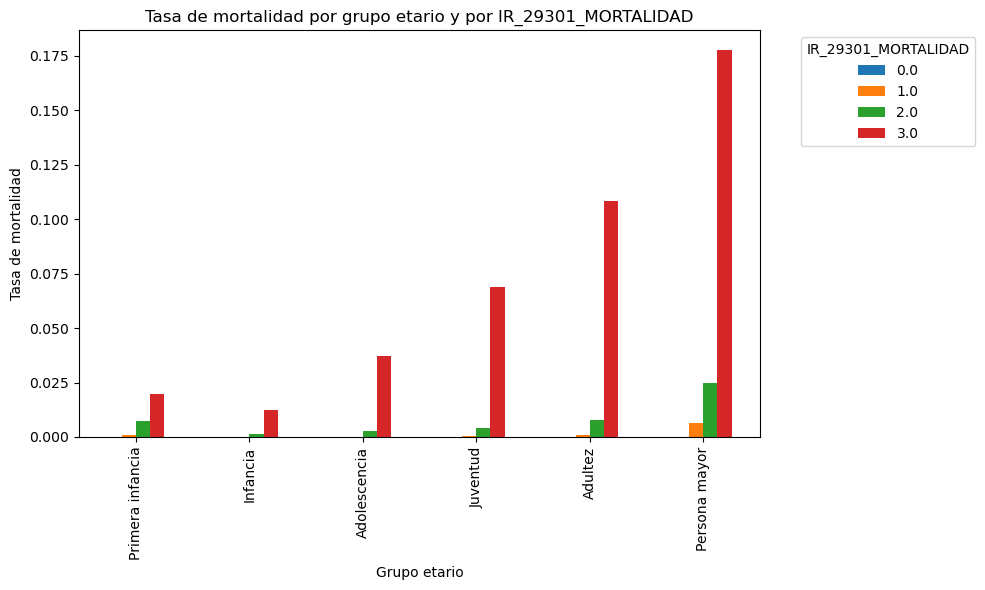

In [12]:
# Group by 'AGE_GROUP' and 'IR_29301_MORTALIDAD', then calculate the mean
grouped = grd_f.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result = (grouped.sum() / grouped.count()).unstack()  # Unstack for better visualization

# Plot the result as a bar chart
result.plot(kind="bar", figsize=(10, 6))

# Add labels and title
plt.title("Tasa de mortalidad por grupo etario y por IR_29301_MORTALIDAD")
plt.xlabel("Grupo etario")
plt.ylabel("Tasa de mortalidad")
plt.legend(title="IR_29301_MORTALIDAD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# Show the plot
plt.show()

In [13]:

# Filtra las filas de grd_f donde la columna 'FALLECIDO' es igual a 1, 
# lo que indica que la persona está registrada como fallecida. 
# El DataFrame resultante contiene solo las filas correspondientes a los fallecidos.
por_hosp = grd_f[grd_f["FALLECIDO"] == 1]

# Cuenta cuántos fallecidos hay en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame por_hosp. Devuelve un conteo de la cantidad de fallecidos por hospital.
m_por_hosp = por_hosp["NOMBRE_HOSPITAL"].value_counts()

# Cuenta cuántas personas hay registradas en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame grd_f. Devuelve un conteo total de personas por hospital.
a_por_hosp = grd_f["NOMBRE_HOSPITAL"].value_counts()

# Calcula la tasa de mortalidad por hospital dividiendo el número de fallecidos en cada hospital 
# (m_por_hosp) entre el número total de personas en ese hospital (a_por_hosp).
# El resultado es una serie que muestra la tasa de mortalidad por hospital.
tasa = m_por_hosp / a_por_hosp

# Ordena los valores de tasa en orden descendente para ver los hospitales con las tasas de mortalidad más altas.
# El parámetro 'inplace=True' modifica el DataFrame o serie original en lugar de crear uno nuevo.
tasa.sort_values(ascending=False, inplace=True)

# Imprime la serie tasa con las tasas de mortalidad por hospital ordenadas de mayor a menor.
tasa.head(10)

NOMBRE_HOSPITAL
 Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río            0.059886
 Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica      0.043684
 Hospital Clínico Metropolitano El Carmen Doctor Luis Valentín Ferrada    0.039677
 Hospital Barros Luco Trudeau (Santiago, San Miguel)                      0.037789
 Hospital Claudio Vicuña (San Antonio)                                    0.034376
 Hospital Adalberto Steeger (Talagante)                                   0.033946
 Hospital Dr. Leonardo Guzmán (Antofagasta)                               0.032976
 Hospital Regional de Rancagua                                            0.031877
 Hospital Dr. Félix Bulnes Cerda (Santiago, Quinta Normal)                0.031481
 Hospital San Luis (Buin)                                                 0.031132
Name: count, dtype: float64

Ahora analizaremos el Hospitalde Urgencia Asistencia Pública Dr. Alejandro del Río, el cual posee la tasa de mortalidad mas alta

In [14]:
hospital_df = grd_f[grd_f["NOMBRE_HOSPITAL"] == " Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río"]
hospital_df["AGE_GROUP"].value_counts()

AGE_GROUP
Persona mayor       5097
Adultez             5080
Juventud             906
Adolescencia         153
Primera infancia       1
Infancia               1
Name: count, dtype: int64

Se puede observar que solo se presenta un paciente en los rangos etarios Primera infancia e Infancia, es mejor eliminarlos del grafico, debido a que afectaran el analisis como outliers

In [15]:
# Remover los pacientes del grupo etario Primera infancia e infancia
hospital_df = hospital_df[~hospital_df["AGE_GROUP"].isin(["Primera infancia", "Infancia"])]
hospital_df["AGE_GROUP"].value_counts()

AGE_GROUP
Persona mayor       5097
Adultez             5080
Juventud             906
Adolescencia         153
Primera infancia       0
Infancia               0
Name: count, dtype: int64

Ahora graficaremos las tasas de mortalidad por grupo etario y valor de mortalidad asignado, para poder visualizar de mejor forma los datos

C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\134800227.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = hospital_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


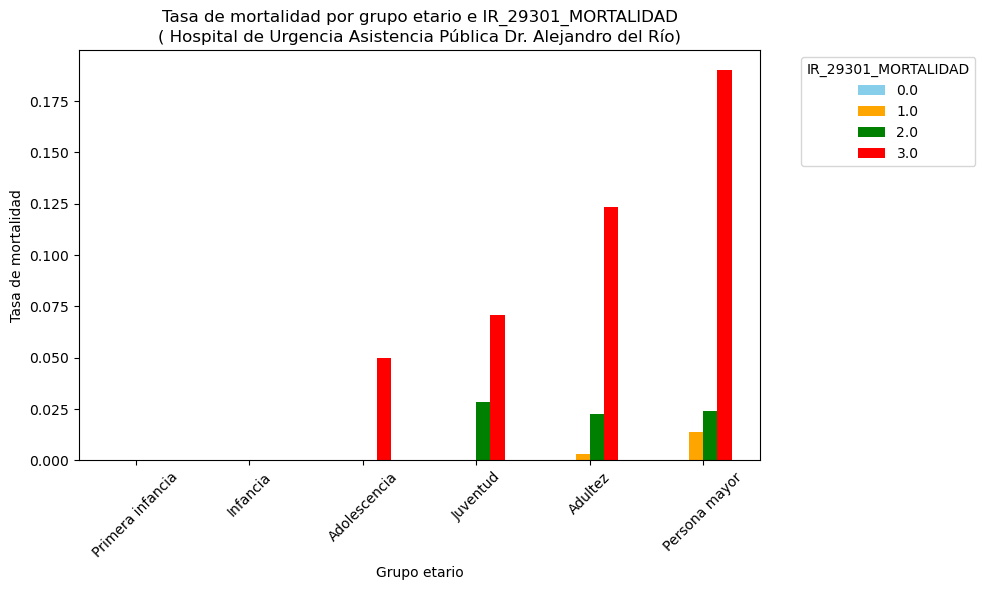

In [16]:
#Agrupar por edad y mortalidad, para calcular la tasa de mortalidad
grouped = hospital_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result = (grouped.sum() / grouped.count()).unstack()  # Unstack for better visualization

# Crear el grafico de barras agrupadas
result.plot(kind="bar", figsize=(10, 6), color=["skyblue", "orange", "green", "red", "purple"])

# Asignar titulo y nombres de ejes al grafico
plt.title("Tasa de mortalidad por grupo etario e IR_29301_MORTALIDAD\n( Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río)")
plt.xlabel("Grupo etario")
plt.ylabel("Tasa de mortalidad")
plt.legend(title="IR_29301_MORTALIDAD", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el grafico
plt.show()

Ahora hacemos un grafico para visualizar la tasa de mortalidad por sexo y grupo etario de todos los datos en el DataFrame

In [17]:
# filtrar para SEXO = HOMBRE
hombres_df = grd_f[grd_f["SEXO"] == "HOMBRE"]
grouped_hombres = hombres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result_hombres = (grouped_hombres.sum() / grouped_hombres.count()).unstack()

# Filtrar para SEXO = MUJER
mujeres_df = grd_f[grd_f["SEXO"] == "MUJER"]
grouped_mujeres = mujeres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result_mujeres = (grouped_mujeres.sum() / grouped_mujeres.count()).unstack()

# Mostrar los valores para los grupos etarios y mortalidad para pacientes de sexo hombre y mujer
print("Mortality Rate for HOMBRES:")
print(result_hombres)

print("\nMortality Rate for MUJERES:")
print(result_mujeres)

C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\2669223604.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hombres = hombres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


Mortality Rate for HOMBRES:
IR_29301_MORTALIDAD       0.0       1.0       2.0       3.0
AGE_GROUP                                                  
Primera infancia     0.000201  0.000913  0.008059  0.019282
Infancia             0.000000  0.000082  0.001384  0.011606
Adolescencia         0.000000  0.000000  0.004872  0.042088
Juventud             0.000000  0.000843  0.006667  0.083374
Adultez              0.000038  0.001991  0.010447  0.116730
Persona mayor        0.000055  0.006635  0.023942  0.179039

Mortality Rate for MUJERES:
IR_29301_MORTALIDAD       0.0       1.0       2.0       3.0
AGE_GROUP                                                  
Primera infancia     0.000000  0.000873  0.005947  0.020123
Infancia             0.000000  0.000000  0.000858  0.013464
Adolescencia         0.000000  0.000069  0.000992  0.032015
Juventud             0.000000  0.000097  0.002081  0.050314
Adultez              0.000042  0.000303  0.005848  0.097954
Persona mayor        0.000000  0.005988  0.

C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\2669223604.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mujeres = mujeres_df.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


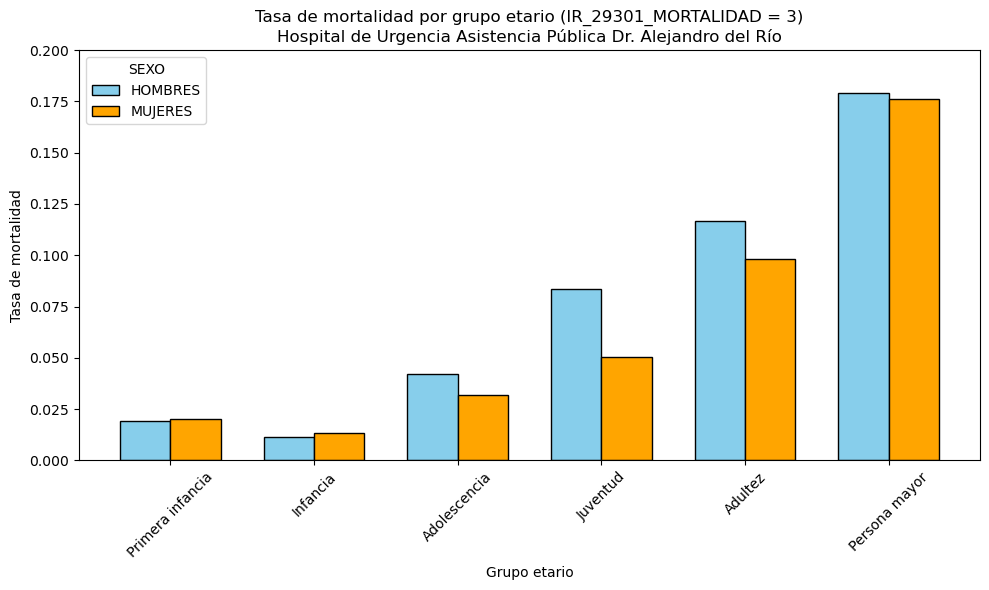

In [18]:
# Filtrar resultados de pacientes con IR_29301_MORTALIDAD == 3
hombres_mortalidad_3 = result_hombres[3]
mujeres_mortalidad_3 = result_mujeres[3]

# Crear grafico de barras agrupadas por grupo etario
x = np.arange(len(hombres_mortalidad_3.index))  
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

# Mostrar datos de HOMBRES
ax.bar(x - width / 2, hombres_mortalidad_3, width, label="HOMBRES", color="skyblue", edgecolor="black")

# Mostrar datos de MUJERES
ax.bar(x + width / 2, mujeres_mortalidad_3, width, label="MUJERES", color="orange", edgecolor="black")

# Se define el rango de valores del eje Y para estandarizar
y_ticks = np.arange(0.000, 0.201, 0.025)
ax.set_yticks(y_ticks)

# Agregar Titulo y nombre de ejer
ax.set_title("Tasa de mortalidad por grupo etario (IR_29301_MORTALIDAD = 3)\nHospital de Urgencia Asistencia Pública Dr. Alejandro del Río")
ax.set_xlabel("Grupo etario")
ax.set_ylabel("Tasa de mortalidad")
ax.legend(title="SEXO")
ax.set_xticks(x)
ax.set_xticklabels(hombres_mortalidad_3.index, rotation=45)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Ahora se realizaran los mismos graficos pero para el hospital 

In [19]:
hombres_df2 = hospital_df[hospital_df["SEXO"] == "HOMBRE"]
grouped_hombres2 = hombres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result_hombres2 = (grouped_hombres2.sum() / grouped_hombres2.count()).unstack()


mujeres_df2 = hospital_df[hospital_df["SEXO"] == "MUJER"]
grouped_mujeres2 = mujeres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
result_mujeres2 = (grouped_mujeres2.sum() / grouped_mujeres2.count()).unstack()


print("Mortality Rate for HOMBRES:")
print(result_hombres2)

print("\nMortality Rate for MUJERES:")
print(result_mujeres2)

Mortality Rate for HOMBRES:
IR_29301_MORTALIDAD  0.0       1.0       2.0       3.0
AGE_GROUP                                             
Primera infancia     NaN       NaN       NaN       NaN
Infancia             NaN       NaN       NaN       NaN
Adolescencia         NaN  0.000000  0.000000  0.100000
Juventud             0.0  0.000000  0.032787  0.086957
Adultez              0.0  0.002136  0.020661  0.132231
Persona mayor        0.0  0.020619  0.018519  0.184889

Mortality Rate for MUJERES:
IR_29301_MORTALIDAD  0.0       1.0       2.0       3.0
AGE_GROUP                                             
Primera infancia     NaN       NaN       NaN       NaN
Infancia             NaN       NaN       NaN       NaN
Adolescencia         NaN  0.000000  0.000000  0.000000
Juventud             0.0  0.000000  0.022727  0.040816
Adultez              0.0  0.004230  0.025735  0.104326
Persona mayor        0.0  0.007702  0.030000  0.195848


C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\851184137.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_hombres2 = hombres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]
C:\Users\joaco\AppData\Local\Temp\ipykernel_3624\851184137.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_mujeres2 = mujeres_df2.groupby(["AGE_GROUP", "IR_29301_MORTALIDAD"])["FALLECIDO"]


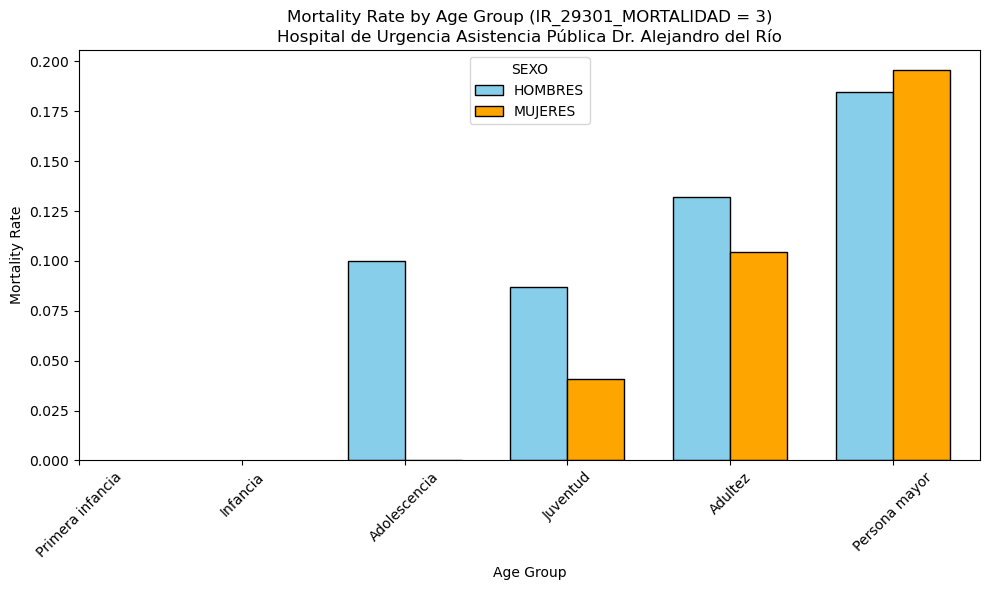

In [20]:
hombres_mortalidad2 = result_hombres2[3]
mujeres_mortalidad2 = result_mujeres2[3]

x = np.arange(len(hombres_mortalidad_3.index))  
width = 0.35  \

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x - width / 2, hombres_mortalidad2, width, label="HOMBRES", color="skyblue", edgecolor="black")


ax.bar(x + width / 2, mujeres_mortalidad2, width, label="MUJERES", color="orange", edgecolor="black")


ax.set_title("Mortality Rate by Age Group (IR_29301_MORTALIDAD = 3)\nHospital de Urgencia Asistencia Pública Dr. Alejandro del Río")
ax.set_xlabel("Age Group")
ax.set_ylabel("Mortality Rate")
ax.legend(title="SEXO")
ax.set_xticks(x)
ax.set_xticklabels(hombres_mortalidad2.index, rotation=45)


plt.tight_layout()
plt.show()

In [21]:
grd_f.drop(["COD_HOSPITAL","CIP_ENCRIPTADO","FECHA_NACIMIENTO",
          "SERVICIO_SALUD","FECHA_INGRESO","FECHA_ALTA","TIPO_ALTA",
          "TIPO_ALTA","DIAGNOSTICO1","NOMBRE_IR",'IR_29301_COD_GRD', 'IR_29301_PESO'], axis=1, inplace= True)

In [22]:
len(grd_f["NOMBRE_HOSPITAL"].unique())

68

In [23]:
cuenta = grd_f["NOMBRE_HOSPITAL"].value_counts()

In [24]:
cuenta.shape

(68,)

Ya que la cantidad de hospitales es sustancial, y habrá que transformarlos a dummies, vamos a reducir el número viendo aquellos que tengan pocos pacientes atendidos. Para esto, vamos a eliminar todos los hospitales que hayan atendido menos del X% de los pacientes. Este threshold puede ser 

In [43]:
numero_atendido_hosp = grd_f.value_counts(["NOMBRE_HOSPITAL"])
Total_atendido = len(grd_f)
propor_atend_hosp = numero_atendido_hosp/Total_atendido
propor_atend_hosp.sort_values

<bound method Series.sort_values of NOMBRE_HOSPITAL                                                      
 Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        0.047768
 Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    0.032845
 Hospital Dr. César Garavagno Burotto (Talca)                            0.030928
 Complejo Asistencial Dr. Víctor Ríos Ruiz (Los Ángeles)                 0.030065
 Hospital Dr. Hernán Henríquez Aravena (Temuco)                          0.028655
                                                                           ...   
 Hospital Dr. Abraham Godoy (Lautaro)                                    0.004287
 Hospital de Tomé                                                        0.004263
 Hospital de Pitrufquén                                                  0.003893
 Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica     0.003458
 Instituto de Neurocirugía Dr. Alfonso Asenjo                            0

Eliminamos los que no cumplan con el threshold

In [52]:
hospitales_cumplen = propor_atend_hosp[propor_atend_hosp>= 0.03] #Cambiar threshold
hospitales_cumplen.head()

NOMBRE_HOSPITAL                                                      
 Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)        0.047768
 Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)    0.032845
 Hospital Dr. César Garavagno Burotto (Talca)                            0.030928
 Complejo Asistencial Dr. Víctor Ríos Ruiz (Los Ángeles)                 0.030065
Name: count, dtype: float64

In [53]:
hospitales_cumplen2 = hospitales_cumplen.index.to_list()
hospitales_cumplen_f = []
for i in hospitales_cumplen2:
    hospitales_cumplen_f.append(i[0])
hospitales_cumplen_f

[' Complejo Hospitalario Dr. Sótero del Río (Santiago, Puente Alto)',
 ' Hospital Clínico Regional Dr. Guillermo Grant Benavente (Concepción)',
 ' Hospital Dr. César Garavagno Burotto (Talca)',
 ' Complejo Asistencial Dr. Víctor Ríos Ruiz (Los Ángeles)']

In [54]:
len(hospitales_cumplen_f)

4

Aislamos los pacientes atendidos en los hospitales que cumplen con el threshold

In [30]:
Casos["TIPO_INGRESO"].describe()

count       147196
unique           3
top       URGENCIA
freq         68307
Name: TIPO_INGRESO, dtype: object

In [41]:
numero_tipos_ingreso = grd_f.value_counts(["TIPO_INGRESO"])
Total_atendido = len(grd_f)
propor_atend_hosp = numero_tipos_ingreso/Total_atendido
propor_atend_hosp.sort_values

<bound method Series.sort_values of TIPO_INGRESO
URGENCIA        0.498885
PROGRAMADA      0.352453
OBSTETRICA      0.148662
Name: count, dtype: float64>

In [31]:
#verificamos si hay filas nulas
grd_f.isna().any().sum()

6

In [32]:
#al ser tan pocas columnas nulas respecto al total de datos se deciden elimiar
grd_f = grd_f.dropna()

# Se reinician los indeices luego de eliminar las filas nulas
grd_f = grd_f.reset_index(drop=True)

In [28]:
grd_f["NOMBRE_HOSPITAL"].isin(hospitales_cumplen_f)

0          False
1           True
2           True
3          False
4          False
           ...  
1039582    False
1039583     True
1039584    False
1039585    False
1039586    False
Name: NOMBRE_HOSPITAL, Length: 1039587, dtype: bool

In [29]:
Casos = grd_f[grd_f["NOMBRE_HOSPITAL"].isin(hospitales_cumplen_f)]
Casos

,NOMBRE_HOSPITAL,SEXO,TIPO_INGRESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO,AGE_GROUP
1,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,URGENCIA,1.0,1.0,22.0,6,0,Juventud
2,Complejo Hospitalario Dr. Sótero del Río (San...,HOMBRE,URGENCIA,1.0,1.0,3.0,1,0,Primera infancia
13,Hospital Dr. César Garavagno Burotto (Talca),MUJER,PROGRAMADA,1.0,1.0,5.0,0,0,Primera infancia
16,Hospital Dr. César Garavagno Burotto (Talca),HOMBRE,PROGRAMADA,1.0,1.0,5.0,0,0,Primera infancia
37,Hospital Dr. César Garavagno Burotto (Talca),MUJER,PROGRAMADA,3.0,2.0,5.0,0,0,Primera infancia
...,...,...,...,...,...,...,...,...,...
1039575,Hospital Dr. César Garavagno Burotto (Talca),HOMBRE,PROGRAMADA,1.0,1.0,4.0,0,0,Primera infancia
1039576,Hospital Dr. César Garavagno Burotto (Talca),HOMBRE,URGENCIA,1.0,1.0,10.0,2,0,Infancia
1039577,Hospital Dr. César Garavagno Burotto (Talca),HOMBRE,URGENCIA,1.0,1.0,10.0,2,0,Infancia
1039580,Hospital Dr. César Garavagno Burotto (Talca),HOMBRE,PROGRAMADA,0.0,0.0,74.0,0,0,Persona mayor


In [ ]:
dummis = pd.get_dummies(Casos)

Ahora, queda hacer el modelo en base al dataframe dummis.